In [3]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
from path import Path

In [104]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Read myopia.csv into a Pandas DataFrame.

In [105]:
#load the dataset into a panda dataframe
path = Path("./Resources/myopia.csv")
df = pd.read_csv(path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


Remove the "MYOPIC" column from the dataset.


Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

In [106]:
df1 = df.drop("MYOPIC", axis =1)
# labels = df ["MYOPIC"]

Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [107]:
#import the standard scaler 
from sklearn.preprocessing import StandardScaler

#scale the data
scaler = StandardScaler()

In [108]:
# scale the X data
df1_scaled =  scaler.fit_transform(df1)

# Apply Dimensionality Reduction

* Perform dimensionality reduction with PCA. How did the number of the features change? For this assignment, preserve 90% of the explained variance in dimensionality reduction.
* Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
* Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [109]:
# set up the PCA model to reflect 90% of the variance 
pca = PCA(n_components =.90)

In [110]:
# fit the PCA model on to the scaled data
principal_components = pca.fit_transform(df1_scaled)
#principal_components

In [111]:
# use the shape attribute to tell the # of pricipal components 
principal_components.shape

(618, 10)

### After performing dimensionality reduction with PCA and preserving 90% of the explained variance,  the number of features changed from 14 to 10. 

In [112]:
# confirm the sum of the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915186

# Reduce the dataset dimensions with t-SNE and visually inspect the results

In [113]:
# Transform PCA data to a DataFrame for t-SNE
df_myopia_pca = pd.DataFrame(
    data=principal_components, columns=["principal component 1", "principal component 2","principal component 3","principal component 4","principal component 5","principal component 6","principal component 7","principal component 8","principal component 9","principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [114]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35, perplexity = 50)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\mahee\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [115]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [116]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

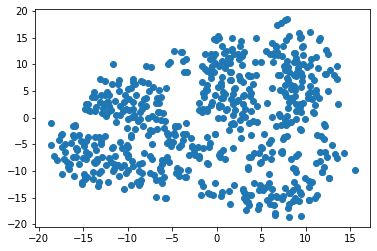

In [117]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [118]:
labels = df ["MYOPIC"]
labels.value_counts() # the number of Myopic(1) and non Myopic(0)

0    537
1     81
Name: MYOPIC, dtype: int64

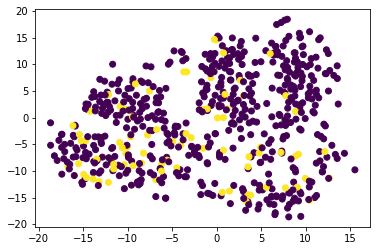

In [119]:
# Visualize the clusters with color
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=labels)
plt.show()

 The clusters above are not distinct

## Running KMeans with PCA Data

* Create an elbow plot to identify the best number of clusters. Make sure to do the following:
* Use a for loop to determine the inertia for each k between 1 through 10.
* If possible, determine where the elbow of the plot is, and at which value of k it appears.

C:\Users\mahee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


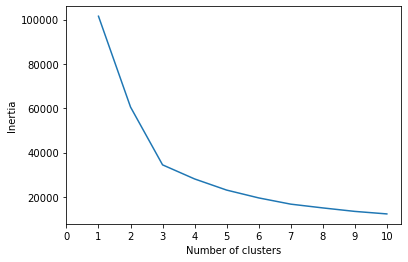

In [120]:
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

###  After looping and determining the inertia for each k between 1 through 10, the elbow of the plot seems to be on 3. Hence, k = 3. 

# Predicting clusters with k=3

In [121]:
# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted group column to the dataframe
df_myopia_pca["group"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,x,y,group
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-9.662504,-3.588317,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-11.043748,-8.931181,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,9.589289,6.934292,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-3.703134,8.594476,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-3.781144,-3.045106,1


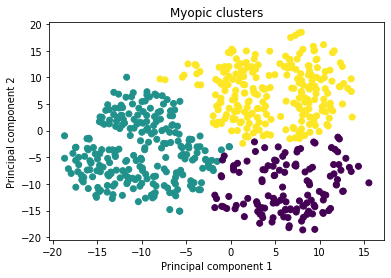

In [123]:
# Visualize the clusters
plt.scatter(x=df_myopia_pca['x'], y=df_myopia_pca['y'], c=df_myopia_pca['group'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopic clusters')
plt.show()

# Make a Recommendation
Based on our findings in this Jupyter notebook, the patients can be clustered into 3 clusters.  